In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression

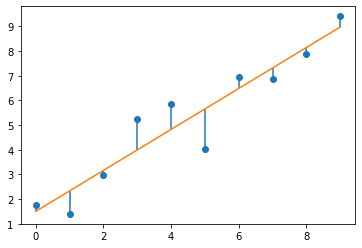

In [2]:
np.random.seed(0)
X = np.arange(10)
y = X + np.random.randn(len(X))
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)
w, b = model.coef_[0], model.intercept_
y_dash = w * X + b
plt.scatter(X, y)
plt.plot(X, y_dash, c="C1")
for _x, _y_dash, _y in zip(X, y_dash, y):
    plt.vlines(_x, _y_dash, _y)

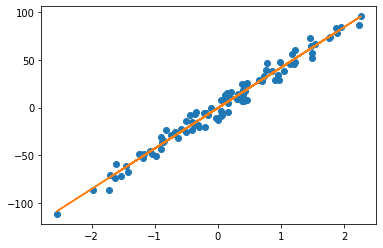

In [3]:
# 生成数据
X, y = make_regression(
    n_samples=100, n_features=1, n_informative=1, random_state=0, noise=6
)

model = LinearRegression()
model.fit(X, y)
w, b = model.coef_[0], model.intercept_
y_dash = w * X + b
plt.scatter(X, y)
plt.plot(X, y_dash, c="C1")
plt.show()

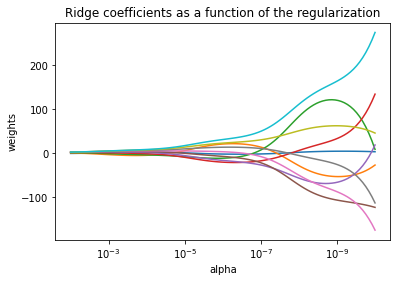

In [4]:
# X 是一个希伯特矩阵
# (高度病态，任何一个元素的点发生变动，整个矩阵的行列式的值和逆矩阵都会发生巨大变化)
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

alphas = np.logspace(-10, -2, 100)
clf = Ridge(fit_intercept=False)

coefs = []
scores = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    scores.append(clf.score(X, y))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.show()